In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# pip install pyxlsb

In [2]:
df = pd.read_excel("C:/1. Yuke/Master 1st semester/MMAI5000_AI/AI-Human-PewData_new.xlsx")

In [3]:
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Columns: 215 entries, Unnamed: 0 to WEIGHT_W99
dtypes: datetime64[ns](2), float64(1), int64(2), object(210)
memory usage: 16.8+ MB


There are 215 columns in total.

The main focus of our proposal is on Chip Implant and Gene Editing, therefore, we are going to clean the dataset by dropping the columns that are not necessary to our main focus. 

In [4]:
# Drop the Interview start & end columns and Device type as they are less relevant to our group's focus 

df.drop(df.iloc[:, 2:5], inplace = True, axis = 1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Columns: 212 entries, Unnamed: 0 to WEIGHT_W99
dtypes: float64(1), int64(2), object(209)
memory usage: 16.6+ MB


In [5]:
# Drop tablet type and all other AI technology groups question codes (e.g. facial recognition technology, 
# driverless passenger vehicle)
# keep questions only for Gene Editing and Chip Implant technologies (our main focus)

df.drop(df.columns[[4] + list(range(35, 110)) + list(range(158, 179))], inplace = True, axis = 1)

df

# Now the dataset contains columns that are necessary to our proposal focus 

,Unnamed: 0,QKEY,LANG_W99,FORM_W99,TECH1_W99,SC1_W99,CNCEXC_W99,EXCITEOE_W99_OE1,EXCITEOE_W99_OE2,EXCITEOE_W99_OE3,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,English,Form 2,NaN,Mostly positive,Equally concerned and excited,NaN,NaN,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,English,Form 1,Mostly positive,NaN,More excited than concerned,Don't know/No answer,NaN,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,English,Form 1,Mostly positive,NaN,Equally concerned and excited,NaN,NaN,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,English,Form 2,NaN,Mostly positive,Equally concerned and excited,NaN,NaN,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,English,Form 2,NaN,Equal positive and negative effects,Equally concerned and excited,NaN,NaN,NaN,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,10255,202101013246,English,Form 2,NaN,Mostly positive,More concerned than excited,NaN,NaN,NaN,...,The Republican Party,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"Less than $30,000",You are NOT registered to vote at your current...,Moderate,Almost constantly,No,Lower income,0.425901
10256,10256,202101013292,English,Form 2,NaN,Mostly positive,Equally concerned and excited,NaN,NaN,NaN,...,NaN,Dem/Lean Dem,Liberal Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Upper income,0.157638
10257,10257,202101013344,English,Form 1,Mostly positive,NaN,More concerned than excited,NaN,NaN,NaN,...,The Democratic Party,Dem/Lean Dem,Liberal Dem/Lean,"Less than $30,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Almost constantly,Yes,Lower income,0.282079
10258,10258,202101013446,English,Form 1,Mostly positive,NaN,More excited than concerned,Personal anecdotes,Helps humans with difficult/dangerous tasks,"Saves time, more efficient",...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Middle income,0.441525


In [6]:
# Check for missing values -- Notice there are missing values under question codes BCHIP  

bchip_columns = df.columns[df.columns.str.contains('BCHIP')]

null_counts = df[bchip_columns].isnull().sum()

null_counts

BCHIP1_W99       5153
BCHIP2_W99       5153
BCHIP3_W99       5153
BCHIP4_a_W99     5153
BCHIP4_b_W99     5153
BCHIP4_c_W99     5153
BCHIP4_d_W99     5153
BCHIP5_W99       5153
BCHIP6_W99       5153
BCHIP7_W99       5153
BCHIP8_W99       5153
BCHIP9_a_W99     5153
BCHIP9_b_W99     5153
BCHIP9_c_W99     5153
BCHIP10_a_W99    5153
BCHIP10_b_W99    5153
BCHIP10_c_W99    5153
BCHIP10_d_W99    5153
BCHIP11_W99      5153
BCHIP12_W99      5153
BCHIP13_a_W99    5153
BCHIP13_b_W99    5153
BCHIP14_a_W99    5153
BCHIP14_b_W99    5153
BCHIP14_c_W99    5153
BCHIP14_d_W99    5153
dtype: int64

In [7]:
# Check for missing values -- Notice there are missing values under question codes GENEV  

gene_columns = df.columns[df.columns.str.contains('GENEV')]

df[gene_columns].isnull().sum()

GENEV1_W99       5153
GENEV2_W99       5153
GENEV3_W99       5153
GENEV4_a_W99     5153
GENEV4_b_W99     5153
GENEV4_c_W99     5153
GENEV4_d_W99     5153
GENEV5_W99       5153
GENEV6_W99       5153
GENEV7_W99       5153
GENEV8_W99       5153
GENEV9_a_W99     5153
GENEV9_b_W99     5153
GENEV9_c_W99     5153
GENEV9_d_W99     5153
GENEV10_W99      5153
GENEV11_W99      5153
GENEV12_a_W99    5153
GENEV12_b_W99    5153
GENEV12_c_W99    5153
GENEV13_a_W99    5153
GENEV13_b_W99    5153
dtype: int64

In [8]:
# There are in total 5153 missing values under each column of BCHIP - 
# indicating 5153 participants did not answer any question of Chip Implant in this questionnaire, 
# we should consider dropping these rows since they did not provide any insight of Chip Implant

df_clean_1 = df.dropna(subset = bchip_columns)

df_clean_1[bchip_columns].isnull().sum()



BCHIP1_W99       0
BCHIP2_W99       0
BCHIP3_W99       0
BCHIP4_a_W99     0
BCHIP4_b_W99     0
BCHIP4_c_W99     0
BCHIP4_d_W99     0
BCHIP5_W99       0
BCHIP6_W99       0
BCHIP7_W99       0
BCHIP8_W99       0
BCHIP9_a_W99     0
BCHIP9_b_W99     0
BCHIP9_c_W99     0
BCHIP10_a_W99    0
BCHIP10_b_W99    0
BCHIP10_c_W99    0
BCHIP10_d_W99    0
BCHIP11_W99      0
BCHIP12_W99      0
BCHIP13_a_W99    0
BCHIP13_b_W99    0
BCHIP14_a_W99    0
BCHIP14_b_W99    0
BCHIP14_c_W99    0
BCHIP14_d_W99    0
dtype: int64

In [9]:
df_clean_1[gene_columns].isnull().sum()    # dataset that have Chip Implant questions cleaned 

# Use this cleaned dataset to check if there's still any missing values for Gene Editing columns 
# Notice there are none, indicating those 5153 participants who did not answer questions for Chip implant 
# also did not answer questions for Gene Editing 

# This is due to the reason all Form 1 respondants are only supposed to answer question regarding 
# social media companies, facial recognition and driveless passenger vehicle 

# Only Form 2 respondants got questions regarding Gene Editing and Chip Implants 

GENEV1_W99       0
GENEV2_W99       0
GENEV3_W99       0
GENEV4_a_W99     0
GENEV4_b_W99     0
GENEV4_c_W99     0
GENEV4_d_W99     0
GENEV5_W99       0
GENEV6_W99       0
GENEV7_W99       0
GENEV8_W99       0
GENEV9_a_W99     0
GENEV9_b_W99     0
GENEV9_c_W99     0
GENEV9_d_W99     0
GENEV10_W99      0
GENEV11_W99      0
GENEV12_a_W99    0
GENEV12_b_W99    0
GENEV12_c_W99    0
GENEV13_a_W99    0
GENEV13_b_W99    0
dtype: int64

In [10]:
df_clean_1.describe(include = 'all')

# The dataset now has 5107 rows to analyze

,Unnamed: 0,QKEY,LANG_W99,FORM_W99,TECH1_W99,SC1_W99,CNCEXC_W99,EXCITEOE_W99_OE1,EXCITEOE_W99_OE2,EXCITEOE_W99_OE3,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
count,5107.000000,5.107000e+03,5107,5107,0,5107,5107,964,161,29,...,1864,5107,5107,5107,4893,5107,5030,5107,5107,5107.000000
unique,NaN,NaN,2,1,0,4,4,13,11,8,...,3,3,5,10,4,6,6,3,4,NaN
top,NaN,NaN,English,Form 2,NaN,Mostly positive,Equally concerned and excited,"Makes life, society better","Saves time, more efficient",Helps with work/labor,...,The Democratic Party,Dem/Lean Dem,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Middle income,NaN
freq,NaN,NaN,4874,5107,NaN,3651,2330,286,36,9,...,872,2553,1711,1447,4389,1831,2320,3279,2501,NaN
mean,5129.626395,1.730272e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.006107
std,2970.325559,7.061264e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.283727
min,0.000000,1.002600e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004226
25%,2570.500000,2.017017e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.390985
50%,5150.000000,2.018011e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603771
75%,7742.500000,2.019010e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.027352


##### Separate the entire dataset into two dataframes:
One focusing on Chip Implant and one focusing on Gene Editing 

In [11]:
# Identifying the general columns -- demographic attributes columns (the ones that do not contain
# BCHIP or GENEV) 

general_columns = df_clean_1.columns[~df_clean_1.columns.str.contains('BCHIP|GENEV')]


In [12]:
df_bchip = df_clean_1[general_columns.union(bchip_columns)]

df_bchip.info()

# in this dataframe -- contains only Chip Implant questions and generic information (demographic attributes)
# by doing so, easier for the group to analyze these two technologies separately 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5107 entries, 0 to 10256
Data columns (total 93 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ALGFAIR_W99            5107 non-null   object 
 1   BCHIP10_a_W99          5107 non-null   object 
 2   BCHIP10_b_W99          5107 non-null   object 
 3   BCHIP10_c_W99          5107 non-null   object 
 4   BCHIP10_d_W99          5107 non-null   object 
 5   BCHIP11_W99            5107 non-null   object 
 6   BCHIP12_W99            5107 non-null   object 
 7   BCHIP13_a_W99          5107 non-null   object 
 8   BCHIP13_b_W99          5107 non-null   object 
 9   BCHIP14_a_W99          5107 non-null   object 
 10  BCHIP14_b_W99          5107 non-null   object 
 11  BCHIP14_c_W99          5107 non-null   object 
 12  BCHIP14_d_W99          5107 non-null   object 
 13  BCHIP1_W99             5107 non-null   object 
 14  BCHIP2_W99             5107 non-null   object 
 15  BCH

In [22]:
df_genev = df_clean_1[general_columns.union(gene_columns)]

df_genev.info()

# in this dataframe -- contains only Gene Editinng questions and generic information (demographic attributes)
# by doing so, easier for the group to analyze these two technologies separately 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5107 entries, 0 to 10256
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ALGFAIR_W99            5107 non-null   object 
 1   CNCEXC_W99             5107 non-null   object 
 2   CONCERNOE_REFUSED_W99  5107 non-null   object 
 3   CONCERNOE_W99_OE1      1792 non-null   object 
 4   CONCERNOE_W99_OE2      325 non-null    object 
 5   CONCERNOE_W99_OE3      51 non-null     object 
 6   DISCRIM1_a_W99         5107 non-null   object 
 7   DISCRIM1_b_W99         5107 non-null   object 
 8   DISCRIM1_c_W99         5107 non-null   object 
 9   DISCRIM1_d_W99         5107 non-null   object 
 10  DISCRIM1_e_W99         5107 non-null   object 
 11  DISCRIM1_f_W99         5107 non-null   object 
 12  EXCITEOE_REFUSED_W99   5107 non-null   object 
 13  EXCITEOE_W99_OE1       964 non-null    object 
 14  EXCITEOE_W99_OE2       161 non-null    object 
 15  EXC

<AxesSubplot:xlabel='F_AGECAT'>

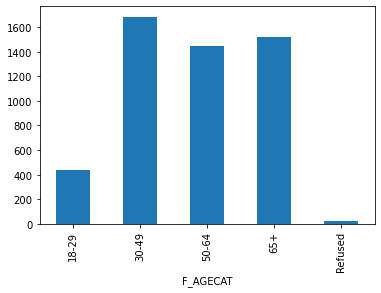

In [15]:
# Group by the participants by their age 

df_bchip.groupby('F_AGECAT')['QKEY'].count().plot(kind = 'bar')

In [18]:
df_bchip.groupby('F_AGECAT')['QKEY'].count().sort_values()

F_AGECAT
Refused      18
18-29       438
50-64      1444
65+        1521
30-49      1686
Name: QKEY, dtype: int64

<AxesSubplot:xlabel='F_GENDER'>

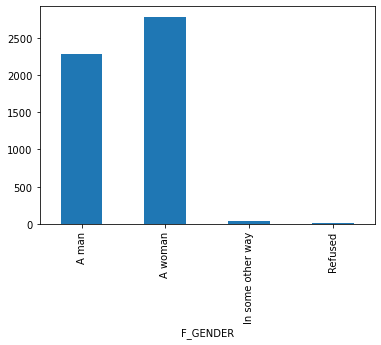

In [16]:
# Group by the participants by their gender
 
df_bchip.groupby('F_GENDER')['QKEY'].count().plot(kind = 'bar')

In [19]:
df_bchip.groupby('F_GENDER')['QKEY'].count().sort_values()

F_GENDER
Refused                11
In some other way      29
A man                2279
A woman              2788
Name: QKEY, dtype: int64

<AxesSubplot:xlabel='F_RACECMB'>

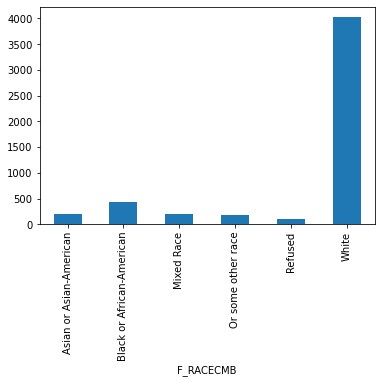

In [21]:
# Group by the participants by their races 

df_bchip.groupby('F_RACECMB')['QKEY'].count().plot(kind = 'bar')

In [20]:
df_bchip.groupby('F_RACECMB')['QKEY'].count().sort_values()


F_RACECMB
Refused                        99
Or some other race            177
Asian or Asian-American       190
Mixed Race                    190
Black or African-American     427
White                        4024
Name: QKEY, dtype: int64

<AxesSubplot:xlabel='F_EDUCCAT2'>

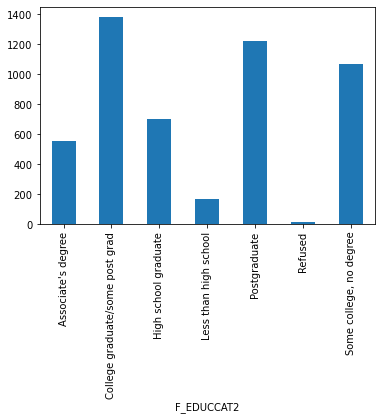

In [23]:
# Group by the participants by their educational background  

df_bchip.groupby('F_EDUCCAT2')['QKEY'].count().plot(kind = 'bar')

In [25]:
df_bchip.groupby('F_EDUCCAT2')['QKEY'].count().sort_values()

F_EDUCCAT2
Refused                              16
Less than high school               166
Associate's degree                  553
High school graduate                703
Some college, no degree            1066
Postgraduate                       1222
College graduate/some post grad    1381
Name: QKEY, dtype: int64

<AxesSubplot:xlabel='F_RELIGCAT1'>

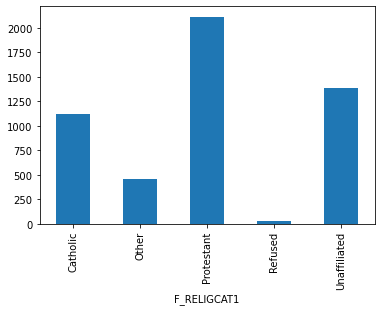

In [26]:
# Group by the participants by their religious background   

df_bchip.groupby('F_RELIGCAT1')['QKEY'].count().plot(kind = 'bar')


In [27]:
df_bchip.groupby('F_RELIGCAT1')['QKEY'].count().sort_values()

F_RELIGCAT1
Refused           31
Other            461
Catholic        1116
Unaffiliated    1383
Protestant      2116
Name: QKEY, dtype: int64

<AxesSubplot:xlabel='F_INC_TIER2'>

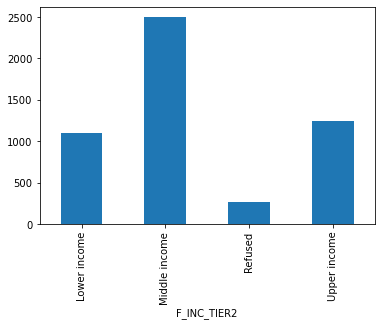

In [28]:
# Group by the participants by their income tier  

df_bchip.groupby('F_INC_TIER2')['QKEY'].count().plot(kind = 'bar')


In [29]:
df_bchip.groupby('F_INC_TIER2')['QKEY'].count().sort_values()

F_INC_TIER2
Refused           264
Lower income     1094
Upper income     1248
Middle income    2501
Name: QKEY, dtype: int64